## Chapter 6

#### ## Topic 6.1
The first step of almost any data project is to read the data, check for errors and special cases, and prepare data for analysis.

The fundamental goal of data science is to use data to answer questions and guide decision making.

As an example, we'll start with a simple question: what is the average birth weight of babies in the United States?

To answer a question like this, we have to find an appropriate dataset or run an experiment to collect it. Then we have to get the data into our development environment and prepare it for analysis, which involves cleaning and validation.

For this question we'll use data from the National Survey of Family Growth, which is available from the National Center for Health Statistics.

Their 2013-2015 dataset includes information about a sample of women in the U.S. and their children.

The Python library we'll use to read and analyze data is Pandas, which we'll import as pd.

In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#reading file 

nsfg = pd.read_hdf('nsfg.hdf5')

nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [2]:
print(nsfg.shape)

nsfg.columns

(9358, 10)


Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [3]:
for key in nsfg.keys():
    print (key)

caseid
outcome
birthwgt_lb1
birthwgt_oz1
prglngth
nbrnaliv
agecon
agepreg
hpagelb
wgt2013_2015


In [4]:
ounces = nsfg['birthwgt_oz1']
ounces

0        4.0
1       12.0
2        4.0
3        NaN
4       13.0
        ... 
9353    11.0
9354     7.0
9355     6.0
9356     3.0
9357     5.0
Name: birthwgt_oz1, Length: 9358, dtype: float64

In [5]:
nsfg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 9357
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   caseid        9358 non-null   int64  
 1   outcome       9358 non-null   int64  
 2   birthwgt_lb1  6485 non-null   float64
 3   birthwgt_oz1  6391 non-null   float64
 4   prglngth      9358 non-null   int64  
 5   nbrnaliv      6485 non-null   float64
 6   agecon        9358 non-null   int64  
 7   agepreg       9109 non-null   float64
 8   hpagelb       6485 non-null   float64
 9   wgt2013_2015  9358 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 804.2 KB


In [6]:
#total Number of null in each column
nsfg.isna().sum()

caseid             0
outcome            0
birthwgt_lb1    2873
birthwgt_oz1    2967
prglngth           0
nbrnaliv        2873
agecon             0
agepreg          249
hpagelb         2873
wgt2013_2015       0
dtype: int64

In [7]:
#Targetting nbrnaliv column

nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
8.0       1
Name: nbrnaliv, dtype: int64

In [8]:
# We found that 8.0 is only once there, it can make difference when we have to deal with standard daviation
# So we'll replace it with NaN

nsfg['nbrnaliv'].replace(8, np.nan, inplace =True)
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

In [9]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [10]:
#Now we have to deal with the agecon agepreg columns,
#Suppose,here the months and days are combined and we have to separate them. divide them by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100


# Compute the difference of agecon from agepreg  
preg_len = agepreg - agecon


# Statistical summery
print('Statistical Summery: \n', preg_len.describe())



Statistical Summery: 
 count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64


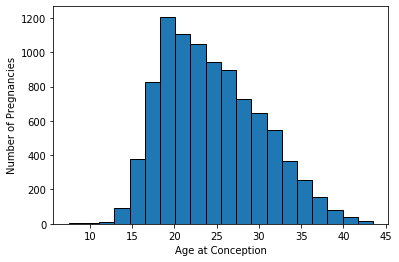

In [11]:
# What is Histogram?
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

plt.hist(agecon, bins=20, edgecolor='black')
plt.xlabel('Age at Conception')
plt.ylabel('Number of Pregnancies')
plt.show()

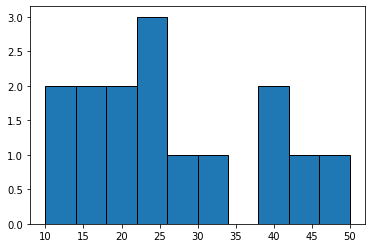

In [12]:
# By default bins are 10

mylist = [10,11,15,16,20,22,25,30,40,41,42,20,23,29,50]
plt.hist(mylist, edgecolor='black')
plt.show()

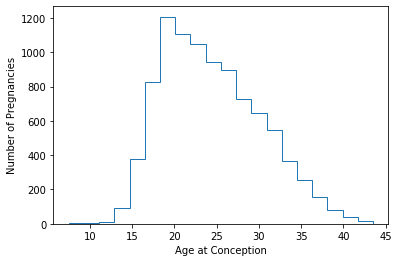

In [13]:
plt.hist (agecon, bins=20, histtype = 'step')
plt.xlabel('Age at Conception')
plt.ylabel('Number of Pregnancies')
plt.show()

In [14]:
# Create a Boolean Series for full-term babies
pre_term = nsfg['prglngth'] < 37
pre_term

0       False
1        True
2        True
3        True
4       False
        ...  
9353     True
9354    False
9355     True
9356    False
9357    False
Name: prglngth, Length: 9358, dtype: bool

In [15]:
pre_term.mean()

0.39987176747168196

In [16]:
live = nsfg['outcome'] == 1
live.mean()

# nsfg['outcome'].value_counts().sort_index()

0.6934173968796752

In [17]:
live_pre_term = live & pre_term
live_pre_term.mean()

0.09724300064116265

In [18]:
single = nsfg['nbrnaliv'] == 1
print(single.mean())
single.head()

0.6816627484505237


0     True
1     True
2     True
3    False
4     True
Name: nbrnaliv, dtype: bool

In [19]:
fullterm = (nsfg['prglngth'] >= 37)
live_fullterm = (live & fullterm)
live_fullterm.mean()

0.5961743962385125

## Average birth weight

In [20]:
ounces = nsfg['birthwgt_oz1']
pounds = nsfg['birthwgt_lb1']

pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [21]:
ounces.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64

In [22]:
pounds.describe()

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

In [23]:
pounds_clean = pounds.replace(98, np.nan)
pounds_clean.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [24]:
ounces_clean = ounces.replace(98, np.nan)
ounces_clean.value_counts().sort_index()

0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
99.0     35
Name: birthwgt_oz1, dtype: int64

In [25]:
#converting ounces to pounds and then adding it to pounds to get the correct value
birth_weight = pounds_clean + ounces_clean / 16
birth_weight.mean()

7.153266823161189

In [26]:
birth_weight.value_counts().sort_index()

0.0000      1
0.1250      1
0.8125      1
0.8750      2
0.9375      1
           ..
13.1875    16
14.0000     2
14.1875     6
15.1875     1
17.9375     1
Length: 180, dtype: int64

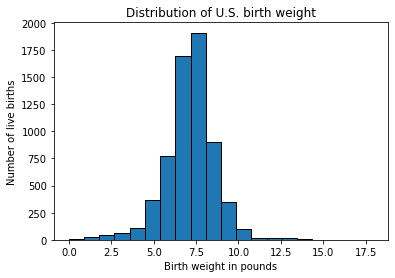

In [27]:
plt.hist(birth_weight.dropna(), bins= 20, histtype='bar', edgecolor = 'black')
plt.xlabel('Birth weight in pounds')
plt.ylabel('Number of live births')
plt.title('Distribution of U.S. birth weight');

In [28]:
nsfg.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [29]:
# .sample() : Return a random sample of items from an axis of object.

n = len(nsfg)
weights = nsfg['wgt2013_2015']
# print(weights.head())
sample = nsfg.sample(n, replace = True, weights = weights)
sample.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
6606,67667,1,6.0,8.0,39,1.0,2558,2633.0,28.0,26422.532773
3321,63929,6,NaN,NaN,37,NaN,2375,NaN,NaN,5631.573012
159,60609,1,8.0,9.0,41,1.0,1750,1825.0,32.0,2976.855042
7978,69108,1,5.0,13.0,40,1.0,3408,3483.0,37.0,9153.372122
7581,68680,2,NaN,NaN,7,NaN,2075,2083.0,NaN,14578.782906


In [30]:
ounces_2 = sample['birthwgt_oz1']
pounds_2 = sample['birthwgt_lb1']

birth_weight_N = pounds_2 + ounces_2 / 16
birth_weight_N.mean()

7.1932078935291415

7.153266823161189


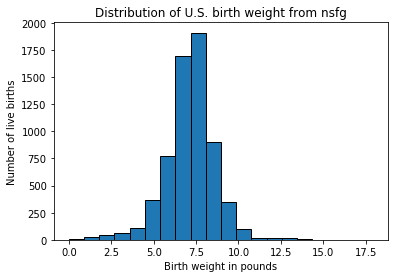

In [31]:
# birth_weight of nsfg
print(birth_weight.mean())
plt.hist(birth_weight.dropna(), bins= 20, histtype='bar', edgecolor = 'black')
plt.xlabel('Birth weight in pounds')
plt.ylabel('Number of live births')
plt.title('Distribution of U.S. birth weight from nsfg');

7.1932078935291415


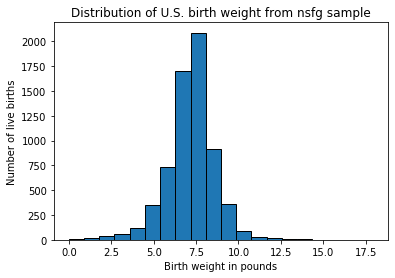

In [32]:
# birth_weight of nsfg sample
print(birth_weight_N.mean())
plt.hist(birth_weight_N.dropna(), bins= 20, histtype='bar', edgecolor = 'black')
plt.xlabel('Birth weight in pounds')
plt.ylabel('Number of live births')
plt.title('Distribution of U.S. birth weight from nsfg sample');

In [33]:
print(birth_weight.describe())
print()
print(birth_weight_N.describe())

count    6390.000000
mean        7.153267
std         1.485002
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

count    6537.000000
mean        7.193208
std         1.422704
min         0.000000
25%         6.437500
50%         7.250000
75%         8.000000
max        17.937500
dtype: float64


# Chapter 6
## Topic 2.1
You'll learn how to represent distributions using Probability distributions.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
gss = pd.read_hdf('gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [36]:
gss.columns

Index(['year', 'age', 'cohort', 'sex', 'race', 'educ', 'realinc', 'gunlaw',
       'grass', 'wtssall'],
      dtype='object')

In [37]:
gss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62466 entries, 0 to 62465
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     62466 non-null  int64  
 1   age      62281 non-null  float64
 2   cohort   62282 non-null  float64
 3   sex      62466 non-null  int64  
 4   race     62466 non-null  int64  
 5   educ     62304 non-null  float64
 6   realinc  55499 non-null  float64
 7   gunlaw   40550 non-null  float64
 8   grass    36222 non-null  float64
 9   wtssall  62466 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 5.2 MB


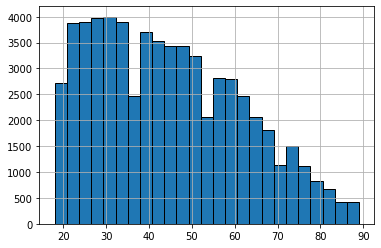

In [38]:
gss['age'].hist(bins=25, edgecolor = 'black')

In [39]:
gss['age'].describe()

count    62281.000000
mean        44.648320
std         17.072244
min         18.000000
25%         30.000000
50%         43.000000
75%         57.000000
max         89.000000
Name: age, dtype: float64

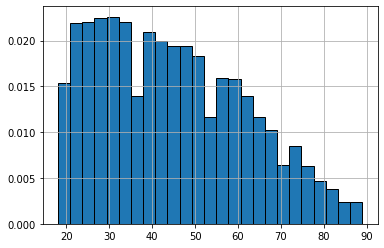

In [67]:
# density : distribution of a quantity

gss['age'].hist(bins=25, edgecolor = 'black', density = True)

In [73]:
#Finding correlation of different features

# Correlation means association - more precisely it is a measure of the extent to which two variables are related.
# A positive correlation is a relationship between two variables in which both variables move in the same direction.
# A negative correlation is a relationship between two variables in which both variables move in the opposite direction

col_list = ['year','age','sex','educ']
subset = gss[col_list]

correlation = subset.corr()
print(correlation)
correlation.style.background_gradient(cmap='Greens').set_precision(2)

          year       age       sex      educ
year  1.000000  0.065482  0.000697  0.214065
age   0.065482  1.000000  0.025159 -0.153742
sex   0.000697  0.025159  1.000000 -0.032907
educ  0.214065 -0.153742 -0.032907  1.000000


,year,age,sex,educ
year,1.00,0.07,0.00,0.21
age,0.07,1.00,0.03,-0.15
sex,0.00,0.03,1.00,-0.03
educ,0.21,-0.15,-0.03,1.00


# KDE Plot
In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination

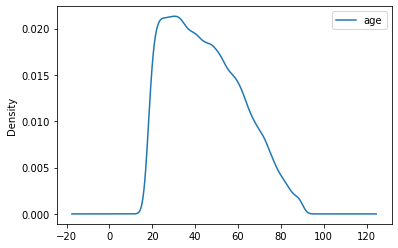

In [77]:
age=gss[['age']]
age.plot.kde()
plt.show()


# In probability theory, a probability density function, or density of a continuous random variable,
# is a function whose value at any given sample in the sample space can be interpreted as providing a relative
# likelihood that the value of the random variable would equal that sample.

The method used to calculate the estimator bandwidth. This can be ‘scott’, ‘silverman’, a scalar constant or a callable. If None (default), ‘scott’ is used.

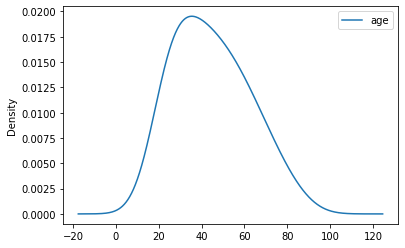

In [84]:
age=gss[['age']]
age.plot.kde(bw_method=0.5)
plt.show()


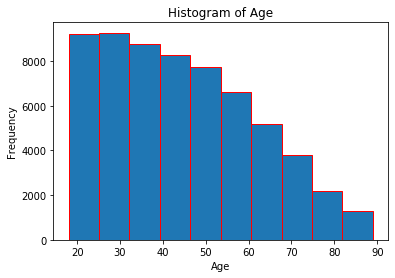

In [87]:
age=gss['age']
plt.hist(age, edgecolor='red')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

A scatterplot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables.

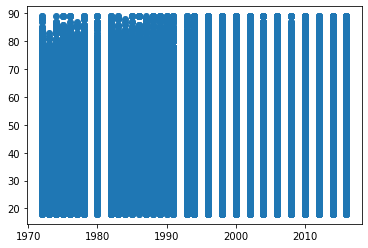

In [94]:
year = gss['year']
plt.plot(year,age,'o')
plt.show()

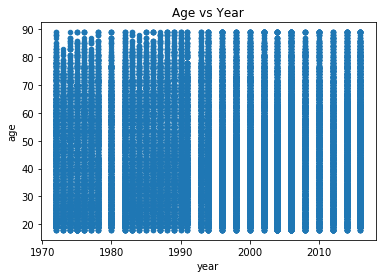

In [93]:
gss.plot(x='year',y='age', kind='scatter', title='Age vs Year')
plt.show()

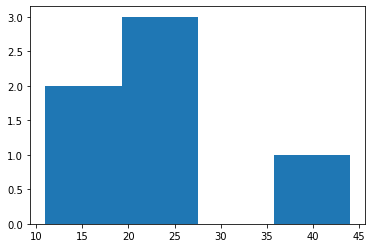

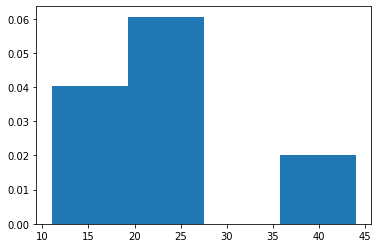

In [95]:
age=[20,12,11,44,21,25]

# 44-11= ans/binn = 3

# 11-14, 15-17


plt.hist(age, bins=4)
plt.show()

#density
#probability density = row count/(toal count * bin width)
# 3/(6 * (11-44/4))
plt.hist(age, bins=4, density= True)
plt.show()